# Colour Pallete 

In [10]:
import os
import numpy as np
from matplotlib import pyplot as plt

from PIL import Image
from collections import Counter
from sklearn.cluster import KMeans

%matplotlib inline

In [49]:
PATH = r'C:\Users\SANSKRITI\Downloads\images.jpg'
WIDTH = 128
HEIGHT = 128
CLUSTERS = 5

In [50]:
image = Image.open(PATH)

In [51]:

image.size

(310, 163)

In [52]:
def calculate_new_size(image):
    if image.width >= image.height:
        wpercent = (WIDTH / float(image.width))
        hsize = int((float(image.height) * float(wpercent)))
        new_width, new_height = WIDTH, hsize
    else:
        hpercent = (HEIGHT / float(image.height))
        wsize = int((float(image.width) * float(hpercent)))
        new_width, new_height = wsize, HEIGHT
    return new_width, new_height

In [53]:
new_width, new_height = calculate_new_size(image)

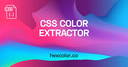

In [54]:
image.resize((new_width, new_height), Image.ANTIALIAS)

In [55]:
image = image.resize((new_width, new_height), Image.ANTIALIAS)

In [56]:
img_array = np.array(image)
img_vector = img_array.reshape((img_array.shape[0] * img_array.shape[1], 3))

In [57]:
model = KMeans(n_clusters=CLUSTERS)

In [58]:
model.fit(img_vector)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [59]:
colors = np.asarray(model.cluster_centers_, dtype='uint8')
print(colors)

[[ 26 180 231]
 [223  56 136]
 [240 202 224]
 [ 98  52 142]
 [160 101 208]]


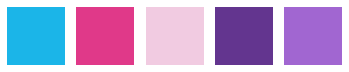

In [69]:
plt.figure(0)
for ix in range(colors.shape[0]):
    patch = np.ones((20, 20, 3))
    patch[:, :, :] = 255 - colors[ix]
    plt.subplot(1, colors.shape[0], ix+1)
    plt.axis('off')
    plt.imshow((patch * 255).astype(np.uint8))
plt.show()

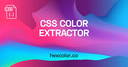

In [63]:
image.resize((new_width, new_height), Image.ANTIALIAS)